In [1]:
import pandas as pd

In [2]:
path = "/Users/julius/repos/sisa3d/master-thesis-ds/results/stage_2/grid_search_clip_scores_v2.csv"
save_path = '/Users/julius/repos/sisa3d/master-thesis-ds/latex/appendix/clip_scores_grid_search.tex'

In [3]:
df = pd.read_csv(path)

In [4]:
df.head()

,clip_score,elongation,compactness,opacity,duration,input_image_path,hyperparameters,full_config
0,0.559228,0.100,10.0000,0.1000,164.262227,images/grid_search/image-7.png,dreamgaussian:\n H: 800\n W: 800\n anneal_t...,dreamgaussian:\n H: 800\n W: 800\n anneal_t...
1,0.730417,1.000,1.0000,0.0100,171.189640,images/grid_search/image-13.png,dreamgaussian:\n H: 800\n W: 800\n anneal_t...,dreamgaussian:\n H: 800\n W: 800\n anneal_t...
2,0.593477,10.000,0.0100,10.0000,160.728970,images/grid_search/image-7.png,dreamgaussian:\n H: 800\n W: 800\n anneal_t...,dreamgaussian:\n H: 800\n W: 800\n anneal_t...
3,0.733917,0.001,0.1000,10.0000,170.172273,images/grid_search/image-13.png,dreamgaussian:\n H: 800\n W: 800\n anneal_t...,dreamgaussian:\n H: 800\n W: 800\n anneal_t...
4,0.744115,0.100,0.0001,0.0001,169.589780,images/grid_search/image-13.png,dreamgaussian:\n H: 800\n W: 800\n anneal_t...,dreamgaussian:\n H: 800\n W: 800\n anneal_t...


In [5]:
cli = df[(df['elongation'] == 0.1) & (df['opacity'] == 0.1) & (df['compactness'] == 0.0)]['clip_score'] 
cli

Series([], Name: clip_score, dtype: float64)

In [6]:
# Plot

# Plot

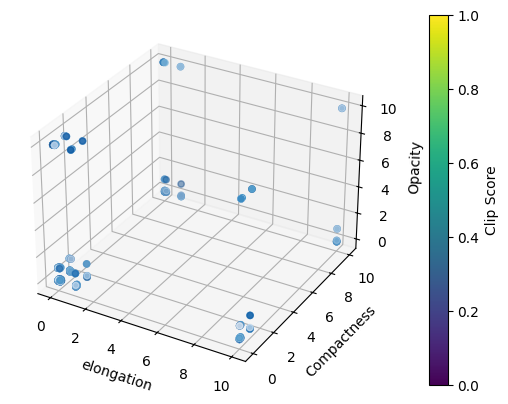

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

a = [0.0001, 0.001, 0.01, 0.1, 10.0]

# Normalize clip_score for color mapping
norm = plt.Normalize(df['clip_score'].min(), df['clip_score'].max())
colors = plt.cm.Blues(norm(df['clip_score']))

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['elongation'], df['compactness'], df['opacity'], c=colors)

# ax.set_xticks(a)
# ax.set_xticklabels(a)
# ax.set_yticks(a)
# ax.set_yticklabels(a)
# ax.set_zticks(a)
# ax.set_zticklabels(a)
# plt.xticks(range(len(axes)), axes)
# plt.yticks(range(len(axes)), axes)
# plt.zticks(range(len(axes)), axes)
# # plt.zticks(range(len(axes)), axes)


# Add color bar to show the clip_score values
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Clip Score')

ax.set_xlabel('elongation')
ax.set_ylabel('Compactness')
ax.set_zlabel('Opacity')

plt.show()

In [8]:
def clip_score_function(elongation, opacity):
    # Example function: Replace this with your actual clip score function
    # return clip score from dataframe for given elongation and opacity
    cli = df[(df['elongation'] == elongation) & (df['opacity'] == opacity) & (df['compactness'] == 0)]['clip_score'] 
    return cli.values[0] if len(cli) > 0 else 0

In [9]:

clip_score = clip_score_function(0.1, 0.1)
print(f'Clip Score for elongation={0.1}, opacity={0.1}: {clip_score}')

Clip Score for elongation=0.1, opacity=0.1: 0


In [10]:
# import matplotlib.pyplot as plt
# import numpy as np

# from matplotlib import cm
# from matplotlib.ticker import LinearLocator

# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})


# print(clip_score_function(0.0, 0.0))

# # Make data.
# X = df['elongation']
# Y = df['opacity']
# X, Y = np.meshgrid(X, Y)
# # create two dimensional clip scores
# Z =  clip_score_function(X, Y)

# # Plot the surface.
# surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                        linewidth=0, antialiased=False)

# # Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
# ax.zaxis.set_major_locator(LinearLocator(10))
# # A StrMethodFormatter is used automatically
# ax.zaxis.set_major_formatter('{x:.02f}')

# # Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)

# plt.show()

# Export table for latex

In [11]:
df["hyperparameter_config_id"] = "e" + df['elongation'].astype(str) + "c" + df['compactness'].astype(str) + "o" + df['opacity'].astype(str)

In [12]:
df = df.filter(items=['clip_score', 'hyperparameter_config_id', "input_image_path", "elongation", "compactness", "opacity"])
# average the clip score across image

# df.groupby('hyperparameter_config_id').mean().sort_values(by='clip_score', ascending=False).head(10)


In [13]:
df.head()

,clip_score,hyperparameter_config_id,input_image_path,elongation,compactness,opacity
0,0.559228,e0.1c10.0o0.1,images/grid_search/image-7.png,0.100,10.0000,0.1000
1,0.730417,e1.0c1.0o0.01,images/grid_search/image-13.png,1.000,1.0000,0.0100
2,0.593477,e10.0c0.01o10.0,images/grid_search/image-7.png,10.000,0.0100,10.0000
3,0.733917,e0.001c0.1o10.0,images/grid_search/image-13.png,0.001,0.1000,10.0000
4,0.744115,e0.1c0.0001o0.0001,images/grid_search/image-13.png,0.100,0.0001,0.0001


In [14]:
df = df.groupby(["hyperparameter_config_id"]).mean("clip_score")


In [15]:
# drop hyperparameter_config_id
df = df.reset_index()
df = df.filter(items=['clip_score', "elongation", "compactness", "opacity"])


In [16]:
# order by clip_score
df = df.sort_values(by='clip_score', ascending=False)
df

,clip_score,elongation,compactness,opacity
25,0.852144,0.0001,1.0000,0.0010
94,0.806968,0.0100,0.1000,1.0000
103,0.797654,0.0100,10.0000,0.0010
172,0.797114,1.0000,10.0000,0.0001
128,0.793612,0.1000,0.1000,0.0100
...,...,...,...,...
187,0.640131,10.0000,0.0010,0.1000
205,0.632933,10.0000,1.0000,0.1000
182,0.587715,10.0000,0.0001,1.0000
133,0.574541,0.1000,1.0000,0.0010


In [17]:
latex_code = df.to_latex(index=False)

# Print the LaTeX code
print(latex_code)

# Save the LaTeX code to a .tex file
with open(save_path, 'w') as f:
    f.write(latex_code)

\begin{tabular}{rrrr}
\toprule
clip_score & elongation & compactness & opacity \\
\midrule
0.852144 & 0.000100 & 1.000000 & 0.001000 \\
0.806968 & 0.010000 & 0.100000 & 1.000000 \\
0.797654 & 0.010000 & 10.000000 & 0.001000 \\
0.797114 & 1.000000 & 10.000000 & 0.000100 \\
0.793612 & 0.100000 & 0.100000 & 0.010000 \\
0.791806 & 0.100000 & 10.000000 & 1.000000 \\
0.791727 & 10.000000 & 1.000000 & 10.000000 \\
0.788196 & 0.010000 & 0.010000 & 0.100000 \\
0.783265 & 0.010000 & 0.001000 & 1.000000 \\
0.780143 & 0.010000 & 10.000000 & 10.000000 \\
0.777399 & 0.001000 & 10.000000 & 0.010000 \\
0.774657 & 0.100000 & 0.000100 & 0.001000 \\
0.773731 & 0.001000 & 10.000000 & 10.000000 \\
0.771220 & 0.010000 & 0.010000 & 0.010000 \\
0.770947 & 0.000100 & 0.001000 & 0.000100 \\
0.768629 & 1.000000 & 0.000100 & 1.000000 \\
0.768191 & 0.001000 & 0.010000 & 0.100000 \\
0.766648 & 0.001000 & 0.001000 & 10.000000 \\
0.766085 & 0.000100 & 0.010000 & 10.000000 \\
0.763037 & 0.001000 & 0.100000 & 0.010000 

In [18]:
# max clip score
df[df['clip_score'] == df['clip_score'].max()]

,clip_score,elongation,compactness,opacity
25,0.852144,0.0001,1.0,0.001


In [19]:
import uuid


In [20]:
unique_id = uuid.uuid4().hex
tmp_configs_dir = f"tmp_configs_{unique_id}"

In [21]:
tmp_configs_dir

'tmp_configs_606b7500b1eb43788da2c9902cf03e42'